In [3]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
!pip install kaggle

In [6]:
!mkdir ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [8]:
!kaggle datasets download -d elinachen717/municipal-solid-waste-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [21]:
!unzip /content/municipal-solid-waste-dataset.zip

Archive:  /content/municipal-solid-waste-dataset.zip
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_0.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_10.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_100.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1000.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1004.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1005.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1007.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1008.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1009.jpeg  
  inflating: Dataset/Biodegradable Images/TRAIN.1_BIODEG_ORI_10035.jpg  
  inflating: Dataset/Biodegradable Images/TRAIN.2_BIODEG_ORI_10025.jpg  
  inflating: Dataset/Biodegradable Images/TRAIN.2_BIODEG_ORI_10043.jpg  
  inflating: Dataset/Biodegradable Im

In [22]:
dataset_dir = '/content/Dataset'
classes = os.listdir(dataset_dir)

output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)
    print(cls, len(images))

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)

    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("Dataset split into training, validation, and test sets.")

Trash Images 130
Biodegradable Images 130
Recyclable Images 130
Dataset split into training, validation, and test sets.


In [23]:
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, 'test')
IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical' # Changed to categorical for multi-class classification
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical' # Changed to categorical
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical', # Changed to categorical
    shuffle=False
)

print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 234 images belonging to 3 classes.
Found 78 images belonging to 3 classes.
Found 78 images belonging to 3 classes.
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}


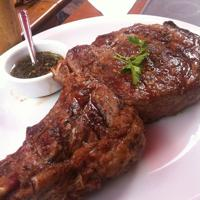

In [24]:
import random
from IPython.display import Image, display
import os
folder_path = '/content/output_dataset/train/Biodegradable Images'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
selected_image = random.choice(image_files)
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

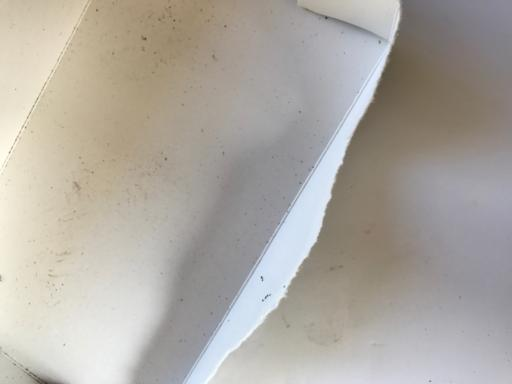

In [25]:
folder_path = '/content/output_dataset/test/Recyclable Images'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
selected_image = random.choice(image_files)
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

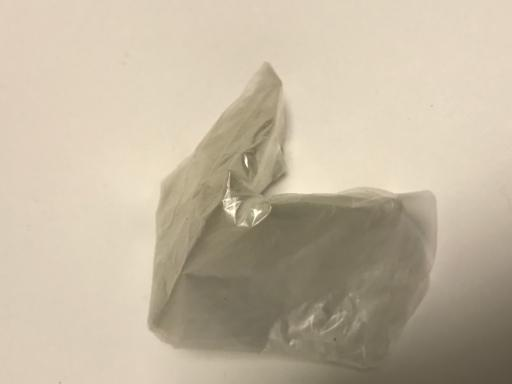

In [26]:
folder_path = '/content/output_dataset/test/Trash Images'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
selected_image = random.choice(image_files)
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

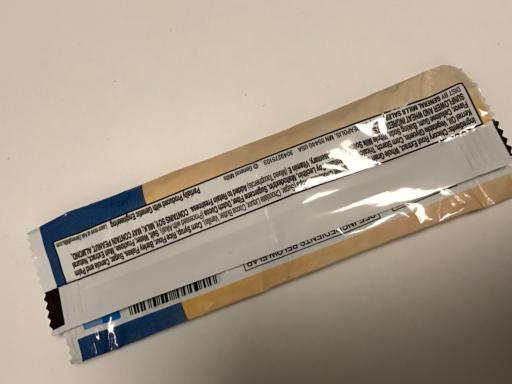

In [27]:
folder_path = '/content/output_dataset/train/Trash Images'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
selected_image = random.choice(image_files)
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [28]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
output = Dense(3, activation='softmax')(x) # Assuming 3 classes for output

vgg16 = Model(vgg.input, output)

vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [31]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

vgg16.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = vgg16.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.4518 - loss: 1.0980 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 167s 21s/step - accuracy: 0.4567 - loss: 1.0906 - val_accuracy: 0.6410 - val_loss: 0.8477
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 161s 21s/step - accuracy: 0.5868 - loss: 0.8763 - val_accuracy: 0.6538 - val_loss: 0.6813
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 160s 21s/step - accuracy: 0.7569 - loss: 0.6740 - val_accuracy: 0.7821 - val_loss: 0.5883
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 162s 21s/step - accuracy: 0.7745 - loss: 0.6276 - val_accuracy: 0.7821 - val_loss: 0.5460
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 163s 21s/step - accuracy: 0.8248 - loss: 0.5450 - val_accuracy: 0.7821 - val_loss: 0.5230
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 200s 21s/step - accuracy: 0.7892 - loss: 0.5360 - val_accuracy: 0.7821 - val_loss: 0.5099
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 204s 21s/step - accuracy: 0.7882 - loss: 0.5451 - val_accuracy: 0.7564 - val_loss: 0.5053
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 200s 20s/step - accuracy: 0.7796 - loss: 0.5267 - val_accuracy: 0.7821 - val_loss: 0.4951
Epo

In [34]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [35]:
labes=[0,1,2]

Test 1

In [41]:
img_path ='/content/output_dataset/train/Biodegradable Images/TEST_BIODEG_HFL_1.jpeg'

In [42]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


array([[1., 0., 0.]], dtype=float32)

Teat-2

In [46]:
img_path ='/content/output_dataset/test/Recyclable Images/cardboard136.jpeg'

In [49]:
import numpy as np
img = load_img(img_path, target_size= (224, 224))
x = img_to_array (img)
X = preprocess_input (x)
preds = vgg16.predict (np.array ( [x]) )
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


array([[3.7621675e-10, 2.4692665e-01, 7.5307339e-01]], dtype=float32)

In [50]:
labels[np.argmax (preds)]

'Trash Images'

Test 3

In [59]:
img_path = '/content/output_dataset/train/Trash Images/TRAIN.4_NBIODEG_CCW_1493.jpg'

In [60]:
import numpy as np
X = img_to_array (img)
img = load_img(img_path, target_size= (224, 224))
x = preprocess_input (x)
preds = vgg16.predict (np.array ( [x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


array([[2.2974191e-24, 1.4873234e-08, 1.0000000e+00]], dtype=float32)

In [61]:
labels[np.argmax(preds)]

'Trash Images'

Test 4

In [71]:
img_path='/content/output_dataset/test/Biodegradable Images/TRAIN.2_BIODEG_ORI_10154.jpg'
import numpy as np
img= load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds -vgg16.predict(np.array([x]))
preds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


array([[2.2974191e-24, 1.4873234e-08, 1.0000000e+00]], dtype=float32)

In [72]:
labels [np.argmax(preds)]

'Trash Images'

test 5

In [76]:
img_path='/content/output_dataset/train/Recyclable Images/paper123.jpeg'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input (x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


array([[9.9784184e-01, 1.0705247e-06, 2.1570460e-03]], dtype=float32)

In [77]:
labels[np.argmax(preds)]

'Biodegradable Images'

In [78]:
vgg16.save('vgg.h5')